In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,f1_score,mean_squared_error,r2_score

#Remove the warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset into dataframe

In [3]:
house_price=pd.read_csv("Bengaluru_House_Data.csv")
house_price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Cleaning

In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#Statics summary
house_price.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
#Check the shape of the dataset
house_price.shape

(13320, 9)

In [7]:

house_price.value_counts()

area_type             availability   location                        size   society  total_sqft   bath  balcony  price 
Super built-up  Area  Ready To Move  Haralur Road                    2 BHK  RInceeg  1243         2.0   2.0      46.00     10
                                     HSR Layout                      2 BHK  NRosete  1140         2.0   2.0      46.00      9
                                     Parappana Agrahara              2 BHK  Peide L  1194         2.0   2.0      47.00      7
                      21-Dec         Kanakpura Road                  3 BHK  PrarePa  1100         3.0   2.0      53.00      5
                      Ready To Move  Raja Rajeshwari Nagar           2 BHK  GrrvaGr  1196         2.0   2.0      40.54      5
                                                                                                                           ..
                      19-Dec          Bhoganhalli                    1 RK   Rosha I  296          1.0   0.0      22.89      

In [8]:
# Check the every columns value counts values
for i in house_price.columns:
    print(house_price[i].value_counts())
    print("%%%"*10)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
%%%%%%%%%%%%%%%

In [9]:
#Check the null values
house_price.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

**Drop features that are not required to build our model**

In [10]:
#Drop the unneccesary column
house_price.drop(columns=["area_type","availability","society","balcony"],inplace=True)

In [11]:
#drop the NA value
df=house_price.dropna()


In [12]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df.sample(3)

,location,size,total_sqft,bath,price
9663,Kaggadasapura,2 BHK,1045,2.0,55.00
2559,Kasavanhalli,3 Bedroom,1870,3.0,200.00
4779,Begur Road,3 BHK,1565,2.0,59.76


# Feature Engineering  
Add new feature for bhk (Bedrooms hall kitchen)

In [14]:
# Seperate the size column into interger and string

#df["BHK"]=df["size"].apply(lambda x:int(x.split(" ")[0]))
df["BHK"] = df["size"].apply(lambda x: int(x.split(" ")[0]) if isinstance(x, str) and " " in x else None)


In [15]:
#Convert the range in avg in a total_sqft

In [16]:
def range_convert(x):
    try: 
        float(x)
    except :
        return False
    return True

In [17]:
#Check specific column which type data contain
df[~df["total_sqft"].apply(range_convert)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


**Take the maximum and manimum value and take thier average**

In [18]:
def convert_sqft(x):
    token  = x.split("-")
    
    if len(token)==2:
        return (float(token[0])+ float(token[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [19]:
convert_sqft("24-2.5")

13.25

In [20]:
df1=df.copy()
df1["total_sqft"]=df1["total_sqft"].apply(convert_sqft)

In [21]:
df1.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [22]:
df1.shape

(13246, 6)

# Feature Engineering  
add new feature called price per square feet

In [23]:
df2=df1.copy()
df2["price_per_sqft"]=df2["price"]*100000/df2["total_sqft"]
df2.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
#Check the location of how many
len(df2.location.unique())

1304

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   BHK             13246 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [26]:
#Remove the leading space in the end of location
df2.location=df2.location.apply(lambda x: x.strip() if isinstance(x, str) and " " in x else None) 

# location_status=df2.groupby("location")["location"].agg("count").sort_values(ascending=False)
# location_status
location_status=df2["location"].value_counts(ascending=False) 
location_status

location
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
                           ... 
singapura paradise            1
Uvce Layout                   1
Achins Road                   1
Wajid layout thanisandra      1
Abshot Layout                 1
Name: count, Length: 880, dtype: int64

In [27]:
location_status.values.sum()

6762

In [28]:
#Check the location of which has less than 10 points
len(location_status[location_status >10] )

115

In [29]:
len(location_status)

880

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [30]:
location_status_less_10=location_status[location_status<=10]
location_status_less_10

location
Sadashiva Nagar             10
Dairy Circle                10
Dodsworth Layout            10
1st Block Koramangala       10
Ganga Nagar                 10
                            ..
singapura paradise           1
Uvce Layout                  1
Achins Road                  1
Wajid layout thanisandra     1
Abshot Layout                1
Name: count, Length: 765, dtype: int64

In [31]:
#df2['location'] = df2['location'].apply(lambda x: "other" if x in location_status_less_10 else x)

df2.location = df2.location.apply(lambda x: "other" if x in location_status_less_10 else x)
len(df2.location.unique())

117

In [32]:
df2.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,None,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,None,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,None,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,None,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,None,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [33]:
df2.shape

(13246, 7)

# Outlier detections  
**#It is extream variation in the dataset or error**  
**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [34]:
df2[df2.total_sqft/df2.BHK <300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,None,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,None,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
print(1020.0/6 <300 )
1020/6

True


170.0

In [36]:
df2.shape

(13246, 7)

In [37]:
#Negative the outliers
df3=df2[~(df2.total_sqft/df2.BHK <300)]
df3.shape

(12502, 7)

**Outlier Removal Using Standard Deviation and Mean**

In [38]:
#Check the max and min price
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [39]:
def remove_outliers(dfs):
    df_out = pd.DataFrame()
    
    # Loop over each location and remove outliers based on price per sqft
    for location, subdf in dfs.groupby("location"):
        mean_price = subdf.price_per_sqft.mean()
        std_price = subdf.price_per_sqft.std()
        
        # Filter the data within one standard deviation of the mean
        filtered_df = subdf[(subdf.price_per_sqft > (mean_price - std_price)) & 
                            (subdf.price_per_sqft <= (mean_price + std_price))]
        
        df_out = pd.concat([df_out, filtered_df], ignore_index=True)
    
    return df_out


In [40]:
df4=remove_outliers(df3)
df4.shape

(5200, 7)

In [41]:
# Also plot the plot the scatter plot to  caompare the price with bedrooms

def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location == location) & (df.BHK == 3)]
    
    plt.figure(figsize=(10,6))
    # Scatter plot for 2 BHK and 3 BHK
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color="red", label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color="green", label='3 BHK', s=50, marker='+')
    plt.xlabel('Total Square Feet Area ')
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

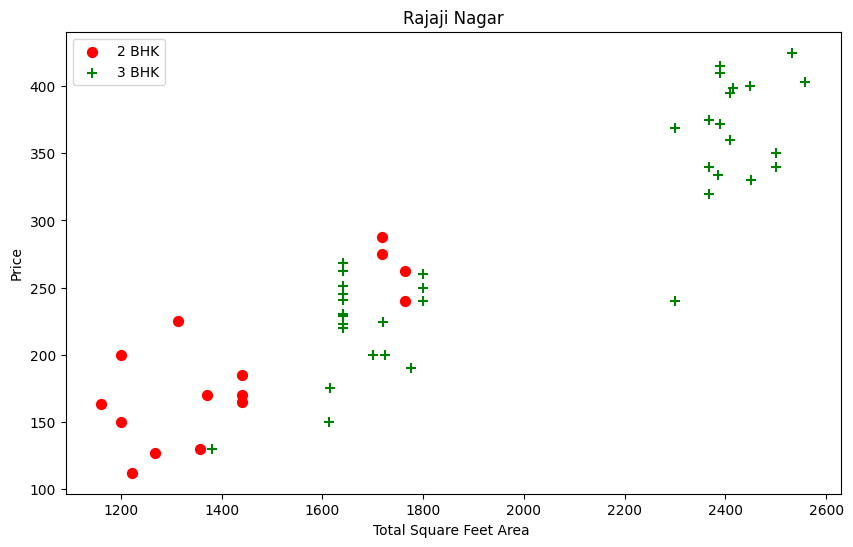

In [42]:
plot_scatter_chart(df4,"Rajaji Nagar")

In [43]:
# Now we remove those 2 BHK apartment whose price per sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(3707, 7)

In [44]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location == location) & (df.BHK == 3)]
    
    plt.figure(figsize=(10,6))
    # Scatter plot for 2 BHK and 3 BHK
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color="red", label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color="green", label='3 BHK', s=50, marker='+')
    plt.xlabel('Total Square Feet Area ')
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

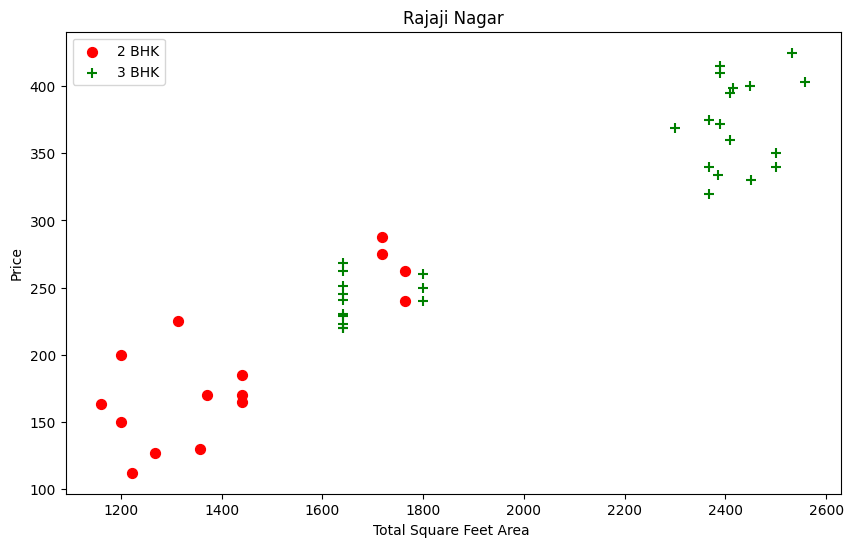

In [45]:
plot_scatter_chart(df5,"Rajaji Nagar")

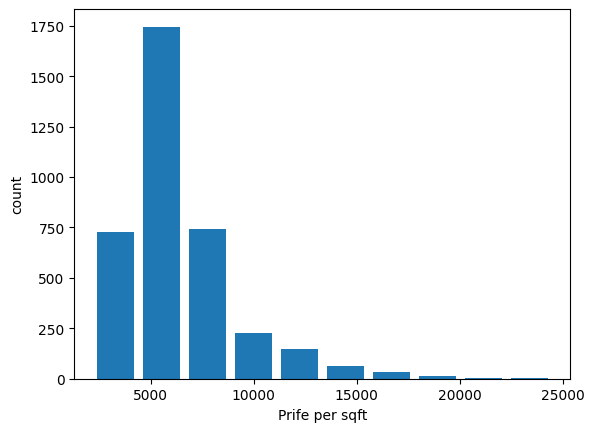

In [46]:
#Plot the histogram 
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Prife per sqft")
plt.ylabel("count")
plt.show()



In [47]:
df5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16.])

In [48]:
#Remove the bath column outliers
df5[df5["bath"]>10]

#It shows the first two column has same bath 
#If  bath room is greater than the betroom then it is outlier


,location,size,total_sqft,bath,price,BHK,price_per_sqft
2622,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0
4020,other,10 BHK,12000.0,12.0,525.0,10,4375.0
4087,other,16 BHK,10000.0,16.0,550.0,16,5500.0
4585,other,11 BHK,6000.0,12.0,150.0,11,2500.0


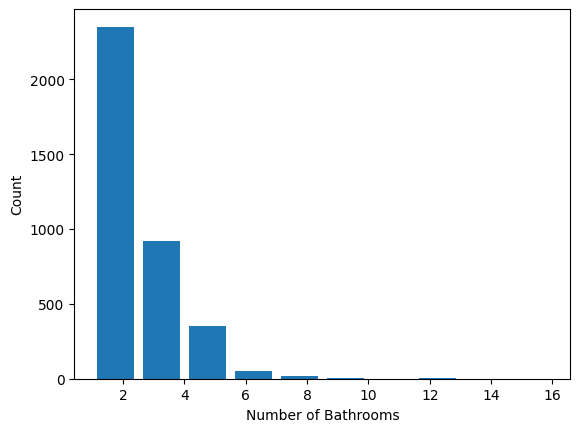

In [49]:
#Plot the histgram of bathroom
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

plt.show()

In [50]:
df.bath.max()

40.0

In [51]:
df5[df5.bath >10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
2622,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0
4020,other,10 BHK,12000.0,12.0,525.0,10,4375.0
4087,other,16 BHK,10000.0,16.0,550.0,16,5500.0
4585,other,11 BHK,6000.0,12.0,150.0,11,2500.0


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [52]:
df5[df5.bath > df5.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
3966,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [53]:
df6=df5[df5.bath < df5.BHK+2]
df6.shape

(3663, 7)

# Apply  the model

In [54]:
#Remove the Unimportant column
df7=df6.drop(["size","price_per_sqft"],axis=1)

In [55]:
#Rename the column name
df7=df7.rename(columns={"BHK":"bhk"})
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Use one hot encoding for location

In [56]:
#Convert the text into numeric
dummies=pd.get_dummies(df7["location"],dtype=int)
dummies.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Somasundara Palya,Sultan Palaya,TC Palaya,Thyagaraja Nagar,Tumkur Road,Varthur Road,Vishveshwarya Layout,Vishwapriya Layout,Yelahanka New Town,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
if "other" in dummies.columns:
    df8 = pd.concat([df7, dummies.drop("other", axis="columns")], axis="columns")
else:
    df8 = pd.concat([df7, dummies], axis="columns")


In [58]:
# Now drop the location column
df8.drop("location",axis=1,inplace=True)

In [59]:
df8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Shivaji Nagar,Somasundara Palya,Sultan Palaya,TC Palaya,Thyagaraja Nagar,Tumkur Road,Varthur Road,Vishveshwarya Layout,Vishwapriya Layout,Yelahanka New Town
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test and split

In [60]:


#Seperate the X and Y variable
X=df8.drop("price",axis=1)
Y=df8[["price"]]

# Split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [61]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Shivaji Nagar,Somasundara Palya,Sultan Palaya,TC Palaya,Thyagaraja Nagar,Tumkur Road,Varthur Road,Vishveshwarya Layout,Vishwapriya Layout,Yelahanka New Town
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5193,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5195,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5196,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#Build the model
model=LinearRegression()
#Train the model
model.fit(X_train,Y_train)

LinearRegression()

In [63]:
#Check the score of the model
model.score(X_test,Y_test)

0.8657097162611267

**Use K Fold cross validation to measure accuracy of our LinearRegression model**

In [64]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv = ShuffleSplit(n_splits=6,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.83363009, 0.8761072 , 0.88532163, 0.77662004, 0.87239231,
       0.84909288])

In [65]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridseachCV(X, Y):
    algo = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                # Remove 'normalize' as it is deprecated
                # "normalize": [True, False]  
            }
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ['random', 'cyclic']
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # updated from 'mse' to 'squared_error'
                'splitter': ["best", "random"]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algo.items():
        grid = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        grid.fit(X, Y)

        scores.append({
            'model': algo_name,
            'best_score': grid.best_score_,
            "best_params": grid.best_params_
        })

    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

# Assuming X and Y are defined somewhere in your code.


In [66]:
find_best_model_using_gridseachCV(X,Y)

,model,best_score,best_params
0,linear_regression,0.848814,{}
1,lasso,0.701164,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.735767,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [67]:
#Before the cleaning data set it gave the 49 r2 score after it gave the 87 r2 score (outliers)

**Test the model for few properties**

In [68]:
def predict_price(location, sqft, bath, bhk):
    try:
        # Find the index for the location column in one-hot encoded data
        loc_index = np.where(X.columns == location)[0][0]
    except IndexError:
        loc_index = -1  # If location is not found

    # Initialize an array with zeros for all features
    x = np.zeros(len(X.columns))

    # Set the values for known features
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    # Set the value for the location feature (if it exists)
    if loc_index >= 0:
        x[loc_index] = 1

    # Return the prediction from the trained model
    return model.predict([x])[0]


In [74]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

array([89.03068516])

In [70]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

array([92.08713043])

In [75]:

predict_price('Indira Nagar',1000, 2, 2)

array([177.96678511])

In [72]:

predict_price('Indira Nagar',1000, 3, 3)

array([181.02323038])

**Export the tested model to a pickle file**

In [76]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

**Export location and column information to a file that will be useful later on in our prediction application**

In [77]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))